# Practical introduction to Machine Learning
## Practical Session 2 | Supervised learning

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge,LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

### 1 : DataSet

In [2]:
ecog = np.load("ECoG.npz")

In [3]:
Xall = ecog['Xall']
Yall = ecog['Yall']
Fe = ecog['Fe']

In [4]:
Xall

array([[-1.3737837 , -1.30303518,  0.43729182, ..., -0.93392455,
         1.11421623, -3.1298364 ],
       [-1.40754509, -1.31210178,  0.68126325, ..., -1.32030805,
         1.15182847, -3.11345062],
       [-1.22628058, -1.50097747,  0.85706294, ..., -1.72732982,
         1.12268174, -3.12009611],
       ...,
       [ 0.0599531 , -0.55449127,  0.0202913 , ..., -0.5885793 ,
        -0.57915436,  0.87131507],
       [-0.04894087, -0.39938902,  0.16811176, ..., -0.46252679,
        -0.48357235,  0.75185823],
       [-0.07524357, -0.23820004,  0.35198339, ..., -0.36208017,
        -0.33437349,  0.64894091]])

In [5]:
Yall

array([[-0.72565782],
       [-0.72219318],
       [-0.71872854],
       ...,
       [-0.37919401],
       [-0.35494155],
       [-0.33068908]])

In [6]:
Fe[0]

array([50], dtype=uint8)

 ### 2 : Data visualization and pre-processing

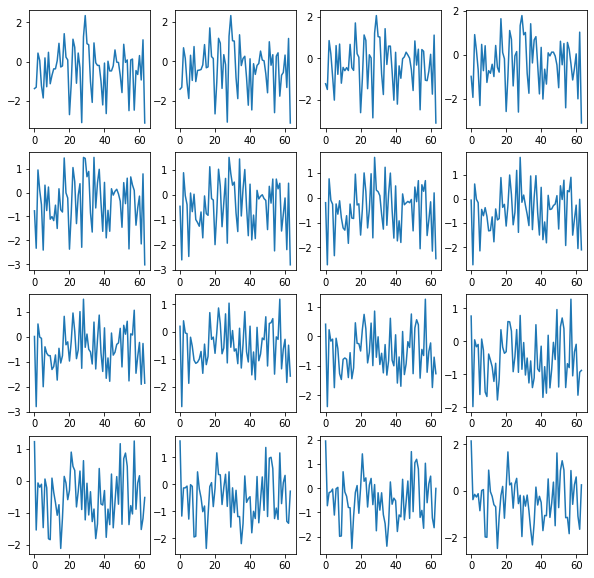

In [7]:
#for i in range(16):
 #   pl.subplot()
  #  pl.imshow(xx[i*180])
pl.figure(figsize = (10, 10))
for i in range(16):
    pl.subplot(4,4,i+1)
    pl.plot(Xall[i])
#X[0].shape
#pl.plot(X[0])
#pl.subplot(X)
#l.subplot(Y)

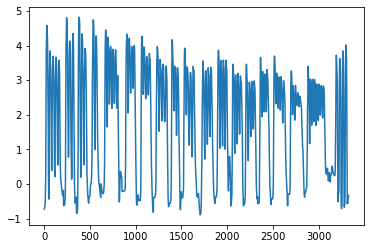

In [8]:
pl.plot(Yall)

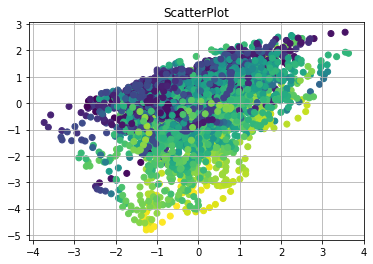

In [9]:
var_45 = []
var_48 = []
for el in Xall:
    var_45.append(el[45])
    var_48.append(el[48])

#for i in range(len(villes)):
#    pl.annotate(villes[i], (Latitude[i], Longitude[i]))
               
pl.scatter(var_45, var_48,c=Yall)
pl.title('ScatterPlot')
pl.grid()

I want to predict the color for the directions

In [10]:
n = 1000
X_train = Xall[:n,:]
X_test = Xall[n:,:]
Y_train = Yall[:n,:]
Y_test = Yall[n:,:]

In [11]:
X_train

array([[-1.3737837 , -1.30303518,  0.43729182, ..., -0.93392455,
         1.11421623, -3.1298364 ],
       [-1.40754509, -1.31210178,  0.68126325, ..., -1.32030805,
         1.15182847, -3.11345062],
       [-1.22628058, -1.50097747,  0.85706294, ..., -1.72732982,
         1.12268174, -3.12009611],
       ...,
       [-0.09589467, -0.4130038 ,  0.15606729, ...,  1.572188  ,
        -0.54075572,  0.87862899],
       [-0.09756581, -0.11680789,  0.04802105, ...,  1.78996188,
        -0.50905215,  1.06557003],
       [-0.16724784,  0.11089083, -0.12382459, ...,  1.83114964,
        -0.39857839,  1.16830132]])

In [12]:
X_train.shape

(1000, 64)

In [13]:
X_test.shape

(2327, 64)

### 3 : Least Squares regression (LS)

In [14]:
const_col = np.ones((X_train.shape[0],1))
X_train_tilde = np.concatenate((X_train,const_col),axis = 1)
X_train_tilde.shape

(1000, 65)

In [15]:
a = np.dot(X_train_tilde.T, X_train_tilde)
c = np.dot(X_train_tilde.T, Y_train)
theta = np.linalg.solve(a,c)
w, b = theta[:-1].T, theta[-1]

In [16]:
print(b,w)

[1.90081255] [[-0.09150694  0.10861623 -0.07305774 -0.27938349  0.25112061  0.41213833
   0.14387528 -0.19811799  0.40869961  0.7059866  -0.4557358   0.02140866
   0.35947183 -0.01042572 -0.17655887 -0.03377368 -0.11345198 -0.72143135
  -0.5950915   0.23329595 -0.65132811 -0.33317441  0.28861537  0.24498034
   0.22062027  0.19042788  0.20709995  0.3273775  -0.65410592  0.11997444
  -0.07491945  0.10667581  0.11003235 -0.42910159 -0.22329342 -0.00381723
  -0.06046664 -0.1595164  -0.48519392  0.15019433  0.25855769 -0.09242374
   0.76314124 -0.0834797   0.04489988 -0.16816255  0.04845934  0.0256902
  -1.03905805  0.16060454 -0.19110549  0.16557271  0.08064689  0.27554638
  -0.01162067 -0.00740264  0.33850545  0.22409642 -0.2196636  -0.26866884
  -0.16469195 -0.23638421  0.04244268  0.5694358 ]]


Prediction for the training set:

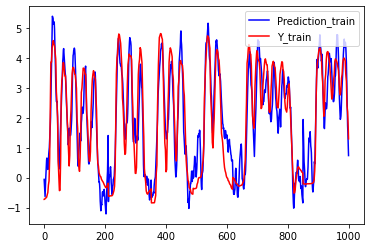

In [17]:
predic = np.dot(w,X_train.T)+b
fig, ax = pl.subplots()
ax.plot(predic.T, '-b', label = 'Prediction_train')
ax.plot(Y_train, '-r', label = 'Y_train')
#ax.axis('equal')
leg=ax.legend()
pl.show()

Prediction for the Training data : ok it seems good.

In [18]:
predic.shape
Y_train.shape

(1000, 1)

Prediction for the test set

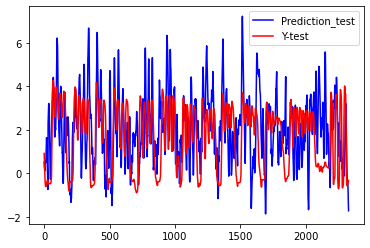

In [19]:
predic2 = np.dot(w,X_test.T)+b
fig, ax = pl.subplots()
ax.plot(predic2.T, '-b', label = 'Prediction_test')
ax.plot(Y_test, '-r', label = 'Y-test')
#ax.axis('equal')
leg=ax.legend()
pl.show()

In [20]:
predic2.shape

(1, 2327)

In [21]:
Y_test.shape

(2327, 1)

The prediction here definitely doesn't seems good on our test data ! It doesn',t follow correctly. Let's look at the MSE and R square values.

#### MSE and R square

In [22]:
#Training Set
y_pred = predic.T
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
print(R2_train,MSE_train)

0.8395001217500111 0.5040654614476062


In [23]:
#Test Set
y_pred = predic2.T
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
print(R2_test, MSE_test)

-0.428170063022258 3.045536876760174


In [24]:
columns = ['Model', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test']
SCORE = pd.DataFrame(columns=columns)

res = {
'Model' : ['OLS'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.8395,-0.42817


Conclusion :
Not very efficient with the least square, we have a MSE 6 times higher in our test_set than our training_set 

In [25]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
w_ols = clf.coef_.flatten()
#w_ols

In [26]:
#Training set 
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
print(R2_train,MSE_train)

0.8395001217500111 0.5040654614476062


In [27]:
#Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
print(R2_test,MSE_test)

-0.42817006302224514 3.045536876760147


We have the same values as with the first part of the LS by hand, that's normal and reassuring.

In [28]:
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.8395,-0.42817


## 4 : Ridge regression


In [29]:
#X_train, X_test, Y_train, Y_test

In [30]:
clf = Ridge(alpha = 1)
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)

In [31]:
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
print(R2_train,MSE_train)

0.8394646608871272 0.5041768297327897


In [32]:
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
print(R2_test,MSE_test)

-0.40861817223915997 3.0038429595355667


In [33]:
res = {
'Model' : ['RIDGE lambda = 1 '], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618


Estimate the Ridge and, predict the labels and compute the performance for 100 values of the regularization parameter λ from 10−3
to 105
.. Plot the evolution of the MSE on training and testing data
as a function of λ. Also plot the evolution of the linear parameters as a function of λ (in the same
figure with subplot).

In [34]:
x = np.logspace(-3,5,100)
x

array([1.00000000e-03, 1.20450354e-03, 1.45082878e-03, 1.74752840e-03,
       2.10490414e-03, 2.53536449e-03, 3.05385551e-03, 3.67837977e-03,
       4.43062146e-03, 5.33669923e-03, 6.42807312e-03, 7.74263683e-03,
       9.32603347e-03, 1.12332403e-02, 1.35304777e-02, 1.62975083e-02,
       1.96304065e-02, 2.36448941e-02, 2.84803587e-02, 3.43046929e-02,
       4.13201240e-02, 4.97702356e-02, 5.99484250e-02, 7.22080902e-02,
       8.69749003e-02, 1.04761575e-01, 1.26185688e-01, 1.51991108e-01,
       1.83073828e-01, 2.20513074e-01, 2.65608778e-01, 3.19926714e-01,
       3.85352859e-01, 4.64158883e-01, 5.59081018e-01, 6.73415066e-01,
       8.11130831e-01, 9.77009957e-01, 1.17681195e+00, 1.41747416e+00,
       1.70735265e+00, 2.05651231e+00, 2.47707636e+00, 2.98364724e+00,
       3.59381366e+00, 4.32876128e+00, 5.21400829e+00, 6.28029144e+00,
       7.56463328e+00, 9.11162756e+00, 1.09749877e+01, 1.32194115e+01,
       1.59228279e+01, 1.91791026e+01, 2.31012970e+01, 2.78255940e+01,
      

In [35]:
MSE_list_train = []
R2_list_train = []

MSE_list_test = []
R2_list_test = []

parameter_list = []
intercept_list = []

for el in x:
    
    clf = Ridge(alpha = el)
    clf.fit(X_train, Y_train)
    predic_train = clf.predict(X_train)
    predic_test = clf.predict(X_test)
   
    parameter_list.append(clf.coef_)
    intercept_list.append(clf.intercept_)
    
    y_pred = predic_train
    y_true = Y_train
    
    
    R2 = r2_score(y_true,y_pred)
    R2_list_train.append(R2)
    
    
    MSE = mean_squared_error(y_true, y_pred)
    MSE_list_train.append(MSE)
    
    y_pred = predic_test
    y_true = Y_test
    
    R2 = r2_score(y_true,y_pred)
    R2_list_test.append(R2)
    
    MSE = mean_squared_error(y_true, y_pred)
    MSE_list_test.append(MSE)
parameter_list

[array([[-0.09150832,  0.10860902, -0.07305577, -0.27938553,  0.25111772,
          0.41213786,  0.14387948, -0.19812079,  0.40869476,  0.70597004,
         -0.45573184,  0.02141078,  0.35946991, -0.0104233 , -0.17654611,
         -0.03376799, -0.11345141, -0.72141806, -0.59507578,  0.23327823,
         -0.65131526, -0.33317532,  0.28861004,  0.24497989,  0.22061738,
          0.19042837,  0.20709628,  0.32737647, -0.65409909,  0.11997077,
         -0.07491151,  0.1066688 ,  0.11003472, -0.42908621, -0.22328252,
         -0.00381594, -0.06046654, -0.15952327, -0.48518359,  0.1501861 ,
          0.25854607, -0.09242405,  0.76312483, -0.08347852,  0.04490221,
         -0.16815107,  0.04845523,  0.02568955, -1.03904504,  0.16059887,
         -0.1911043 ,  0.16557185,  0.0806508 ,  0.27554141, -0.01162465,
         -0.00739785,  0.3384972 ,  0.22409557, -0.2196639 , -0.26866423,
         -0.16468601, -0.23637531,  0.04243728,  0.56942928]]),
 array([[-0.0915086 ,  0.10860755, -0.07305537, 

In [36]:
parameter_list = np.array(parameter_list)
parameter_list = parameter_list.reshape((100,64))
parameter_list

array([[-9.15083152e-02,  1.08609024e-01, -7.30557718e-02, ...,
        -2.36375306e-01,  4.24372825e-02,  5.69429276e-01],
       [-9.15085969e-02,  1.08607550e-01, -7.30553702e-02, ...,
        -2.36373486e-01,  4.24361783e-02,  5.69427941e-01],
       [-9.15089362e-02,  1.08605774e-01, -7.30548865e-02, ...,
        -2.36371293e-01,  4.24348483e-02,  5.69426334e-01],
       ...,
       [ 8.63765452e-04, -2.89732692e-04,  2.59052296e-03, ...,
         2.17336792e-03, -2.69095485e-03,  8.63775418e-03],
       [ 7.44275049e-04, -2.01682793e-04,  2.21556201e-03, ...,
         1.82236380e-03, -2.24255816e-03,  7.23292663e-03],
       [ 6.37505563e-04, -1.39187402e-04,  1.88590734e-03, ...,
         1.52586163e-03, -1.86746494e-03,  6.04870329e-03]])

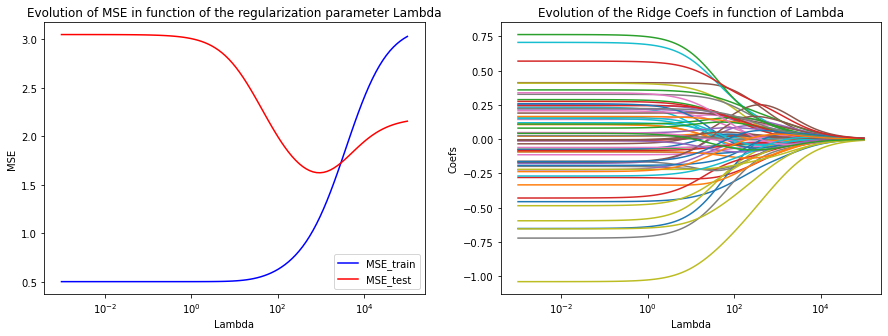

In [37]:
pl.figure(figsize=(15, 5))
pl.subplot(121)
pl.title("Evolution of MSE in function of the regularization parameter Lambda")
pl.xlabel('Lambda')
pl.ylabel('MSE')
pl.semilogx(x,MSE_list_train, '-b', label = 'MSE_train')
pl.semilogx(x,MSE_list_test, '-r', label = 'MSE_test')
pl.legend()

pl.subplot(122)
pl.title('Evolution of the Ridge Coefs in function of Lambda')
pl.xlabel('Lambda')
pl.ylabel('Coefs')
for i in range(parameter_list.shape[1]):
    pl.semilogx(x, parameter_list[:,i])
pl.show()

Interpretation:

By increasing lambda, we decrease the values of the coefficients.
By this Regularization, we look that by having a pretty "high" lambda, in our scale, we are diminishing the MSE_test to a certain point and after a specific area, we have an increasing of this MSE.
In the opposite, the more lambda is high, the more MSE_train is high. that's why we have to focus and to find a compromise to minimize the MSE_test and the MSE_train.
The goal is to find a good balance between underfitting and overfitting.

#### Best performance:

In [38]:
np.argmin(MSE_list_test)

74

In [39]:
best_x = x[74]
#MSE_list_test[73],MSE_list_test[74],MSE_list_test[75],
best_x

954.5484566618347

In [40]:
clf = Ridge(alpha = best_x)
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)


#Performance on Training Set
y_pred_train = predic_train
y_true_train = Y_train
R2_train = r2_score(y_true_train,y_pred_train)
MSE_train = mean_squared_error(y_true_train, y_pred_train)
print('R2 train best alpha ',R2_train,' ; MSE train  best alpha :',MSE_train)

#Performance on Test Set
y_pred_test = predic_test
y_true_test = Y_test
R2_test = r2_score(y_true_test,y_pred_test)
MSE_test = mean_squared_error(y_true_test, y_pred_test)
print('R2 test  best alpha ',R2_test,'; MSE test   best alpha :',MSE_test)


R2 train best alpha  0.6268406996047916  ; MSE train  best alpha : 1.1719430382009628
R2 test  best alpha  0.2384876612903788 ; MSE test   best alpha : 1.623905982695207


In [41]:
res = {
'Model' : ['RIDGE best lambda (955) '], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488


Interpretation:
    The best alpha gives us the best performances, with the lowest MSE in our alpha choosed, and we have pretty good "close" scores.

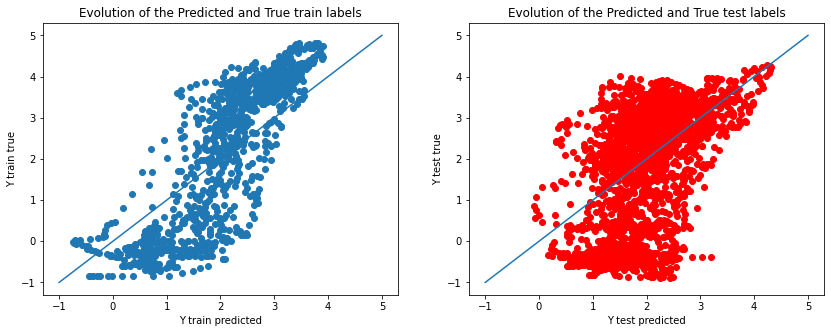

In [42]:
pl.figure(figsize=(14, 5))


pl.subplot(121)
pl.title('Evolution of the Predicted and True train labels')
pl.xlabel('Y train predicted')
pl.ylabel('Y train true')
pl.scatter(predic_train, Y_train)
pl.plot([-1,5], [-1,5])



pl.subplot(122)
pl.title('Evolution of the Predicted and True test labels')
pl.scatter(predic_test, Y_test, color='red')
pl.xlabel('Y test predicted')
pl.ylabel('Y test true')
pl.plot([-1,5], [-1,5])
pl.show()

Interpretation:

The more the points are close to the blue line, the better, that is exactly when Y predicted samples and Y true samples are equal.
For the test set, it seems that we have lots of points are well placed, and some are far from the blue line...

In [43]:
def plot_train_test(pred_train, pred_test):
    
    pl.figure(figsize = (30,15))
    pl.subplot(221)
    pl.title('Predicted and True train Labels')
    pl.plot(Y_train, label='True trained labels')
    pl.plot(pred_train, label='Predicted', color = 'red')
    pl.ylabel('Variation of the flexion')
    pl.xlabel('Time')
    pl.legend()
    
    pl.figure(figsize = (30,15))
    pl.subplot(222)
    pl.title('Predicted and True test Labels')
    pl.plot(Y_test, label='True test labels')
    pl.plot(pred_test, label='Predicted' , color = 'red')
    pl.ylabel('Variation of the flexion')
    pl.xlabel('Time')
    pl.legend()
    

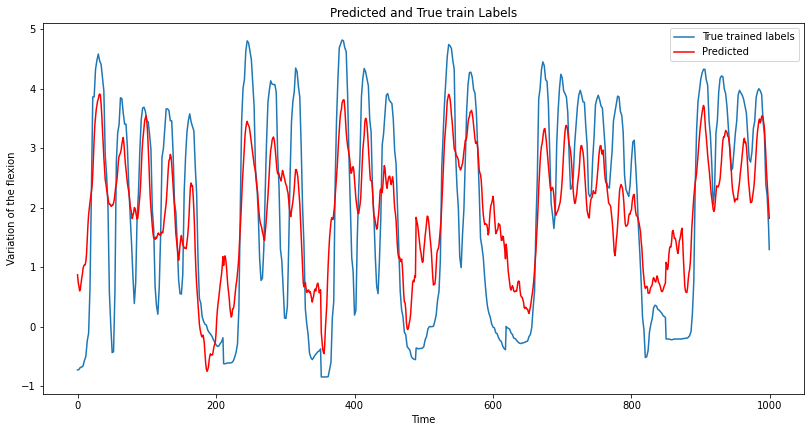

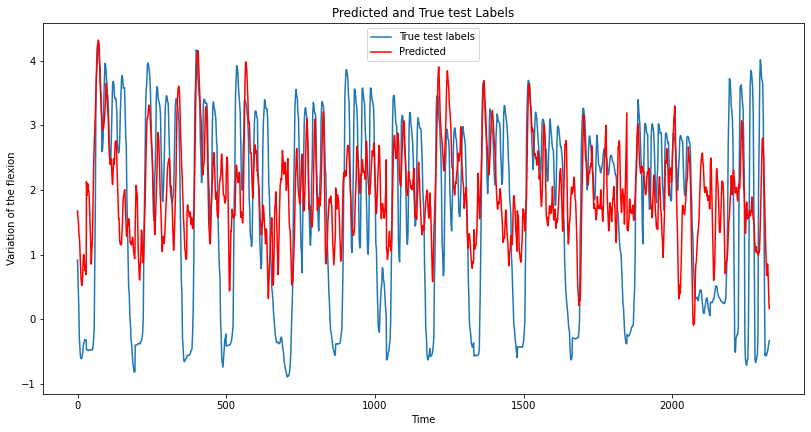

In [44]:
plot_train_test(y_pred_train,y_pred_test)

Interpretation

Our prediction in the train set seems worse than the OLS.
However they seems better for the test set. We are going to watch those supposition with the MSE and R2.

In [45]:
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488


We have a far better MSE_test with the best parameter than the LS.

In [46]:
w_ridge = clf.coef_.flatten()

In [47]:
w_ridge

array([-0.02640053, -0.05029049, -0.02029002, -0.10571625,  0.05316002,
        0.15274951,  0.09436534, -0.05960404,  0.02433899,  0.09325278,
       -0.14928329, -0.00844216,  0.1438586 ,  0.0162682 ,  0.07282022,
        0.22308054, -0.0472768 , -0.08615963, -0.03230092, -0.06062023,
        0.0397016 , -0.10063247,  0.0509786 ,  0.03414485,  0.10965682,
        0.09850931,  0.00731693,  0.08773057, -0.17095552,  0.00581379,
       -0.03021429,  0.03404373,  0.09524923, -0.07085093, -0.03220416,
        0.01077314, -0.019025  , -0.04747229, -0.06084588, -0.0312516 ,
       -0.04825823, -0.10435244,  0.08701048, -0.02586379,  0.06137933,
        0.13959278,  0.02391728,  0.000809  , -0.32018826, -0.03275795,
        0.03137106,  0.06599747,  0.06549858,  0.05217235, -0.06185228,
        0.01958806, -0.03206775,  0.06795038, -0.11902383, -0.01847734,
        0.05444363,  0.03564301, -0.06482949,  0.19434918])

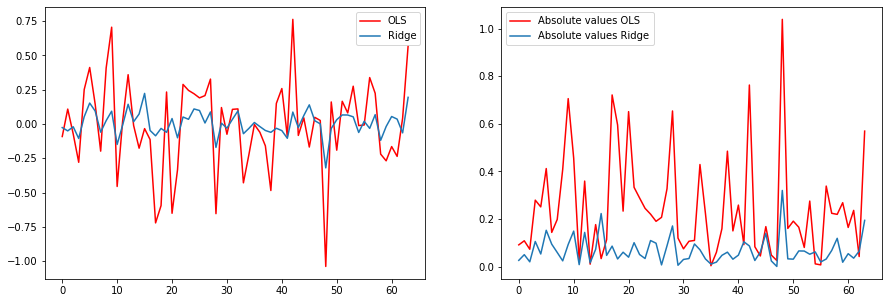

In [48]:
pl.figure(figsize=(15, 5))
pl.title('Coefficients')
pl.subplot(121)
pl.plot(w_ols, label='OLS', color = 'red')
pl.plot(w_ridge, label='Ridge')
pl.legend()

pl.subplot(122)
pl.plot(np.abs(w_ols), label='Absolute values OLS', color = 'red')
pl.plot(np.abs(w_ridge), label='Absolute values Ridge')
pl.legend()
pl.show()

Interpretation:
    
    We can see that for the ridge, the coefficient doesn't take extreme values, as for the OLS.

# 5 Variable selection with the Lasso

In [49]:
clf = Lasso()
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
print(R2_train,MSE_train)
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
print(R2_test,MSE_test)

0.0 3.1405971577280063
-0.02729265197579034 2.190675841640482


In [50]:
res = {
'Model' : ['Lasso default'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293


With the default parameters, we have better MSE for test than for the train

In [51]:
x = np.logspace(-3,5,100)

In [52]:
MSE_list_train = []
R2_list_train = []

MSE_list_test = []
R2_list_test = []

parameter_list = []
intercept_list = []

for el in x:
    
    clf = Lasso(alpha = el)
    clf.fit(X_train, Y_train)
    predic_train = clf.predict(X_train)
    predic_test = clf.predict(X_test)
   
    parameter_list.append(clf.coef_)
    intercept_list.append(clf.intercept_)
    
    y_pred = predic_train
    y_true = Y_train
    
    
    R2 = r2_score(y_true,y_pred)
    R2_list_train.append(R2)
    
    
    MSE = mean_squared_error(y_true, y_pred)
    MSE_list_train.append(MSE)
    
    y_pred = predic_test
    y_true = Y_test
    
    R2 = r2_score(y_true,y_pred)
    R2_list_test.append(R2)
    
    MSE = mean_squared_error(y_true, y_pred)
    MSE_list_test.append(MSE)
parameter_list

[array([-0.0949477 ,  0.08422578, -0.04778231, -0.28289395,  0.23096336,
         0.39096095,  0.14654166, -0.20014259,  0.39627733,  0.66842396,
        -0.44823107,  0.0215228 ,  0.34997362, -0.        , -0.15247227,
        -0.02116502, -0.1225275 , -0.68469137, -0.55541915,  0.19658636,
        -0.63381807, -0.33650854,  0.27560633,  0.24231658,  0.2140541 ,
         0.18816186,  0.19684112,  0.31188303, -0.63805194,  0.11743998,
        -0.04334625,  0.09078412,  0.11368353, -0.38395652, -0.19138518,
        -0.00241951, -0.05600911, -0.17454136, -0.47894616,  0.11580023,
         0.23155224, -0.07823656,  0.74802058, -0.06758334,  0.04189291,
        -0.12385774,  0.02307875,  0.01766438, -1.01991897,  0.15085785,
        -0.17931114,  0.16445313,  0.08866122,  0.25865877, -0.00599005,
         0.        ,  0.31080795,  0.22113859, -0.21482583, -0.25213318,
        -0.13965466, -0.20405339,  0.00593625,  0.5634843 ]),
 array([-0.09565502,  0.07977359, -0.04282857, -0.2838175 ,  0

In [53]:
parameter_list = np.array(parameter_list)
parameter_list = parameter_list.reshape((100,64))
parameter_list

array([[-0.0949477 ,  0.08422578, -0.04778231, ..., -0.20405339,
         0.00593625,  0.5634843 ],
       [-0.09565502,  0.07977359, -0.04282857, ..., -0.19818026,
         0.        ,  0.5617981 ],
       [-0.09562923,  0.0752707 , -0.03792675, ..., -0.19078621,
         0.        ,  0.55880572],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        ,  0.        ]])

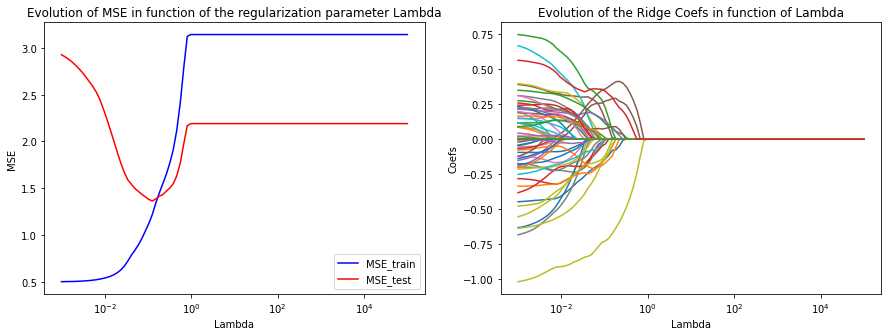

In [54]:
pl.figure(figsize=(15, 5))
pl.subplot(121)
pl.title("Evolution of MSE in function of the regularization parameter Lambda")
pl.xlabel('Lambda')
pl.ylabel('MSE')
pl.semilogx(x,MSE_list_train, '-b', label = 'MSE_train')
pl.semilogx(x,MSE_list_test, '-r', label = 'MSE_test')
pl.legend()

pl.subplot(122)
pl.title('Evolution of the Ridge Coefs in function of Lambda')
pl.xlabel('Lambda')
pl.ylabel('Coefs')
for i in range(parameter_list.shape[1]):
    pl.semilogx(x, parameter_list[:,i])
pl.show()

Interpretation : 
    
    We have the same similarities than for the ridge very same question.
However we don't have the same "end"
there is a gap where when lambda is superior of 1, then there are no evolution ! 

**Best performance**

In [55]:
np.argmin(MSE_list_test)

26

In [56]:
best_x = x[26]
print(MSE_list_test[25],MSE_list_test[26],MSE_list_test[27])
best_x

1.381346065755538 1.3659542352560026 1.3868457943647563


0.1261856883066021

the best parameter seems to be for the 26th position in my x parameter list, and is almost equal to 0.126

In [57]:
clf = Lasso(alpha = best_x)
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)


#Performance on Training Set
y_pred_train = predic_train
y_true_train = Y_train
R2_train = r2_score(y_true_train,y_pred_train)
MSE_train = mean_squared_error(y_true_train, y_pred_train)
print('R2 train best alpha ',R2_train,' ; MSE train  best alpha :',MSE_train)

#Performance on Test Set
y_pred_test = predic_test
y_true_test = Y_test
R2_test = r2_score(y_true_test,y_pred_test)
MSE_test = mean_squared_error(y_true_test, y_pred_test)
print('R2 test  best alpha ',R2_test,'; MSE test   best alpha :',MSE_test)

R2 train best alpha  0.6110411200657935  ; MSE train  best alpha : 1.2215631527944377
R2 test  best alpha  0.3594512149442919 ; MSE test   best alpha : 1.3659542352560026


In [58]:
res = {
'Model' : ['Lasso best lambda = 0.126 '], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451


For the result we have, it seems that the best model used is Lasso with the best lambda, comparing to other model.

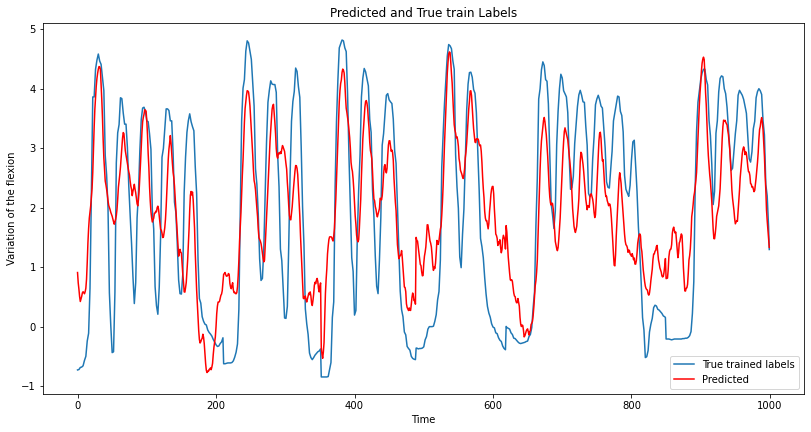

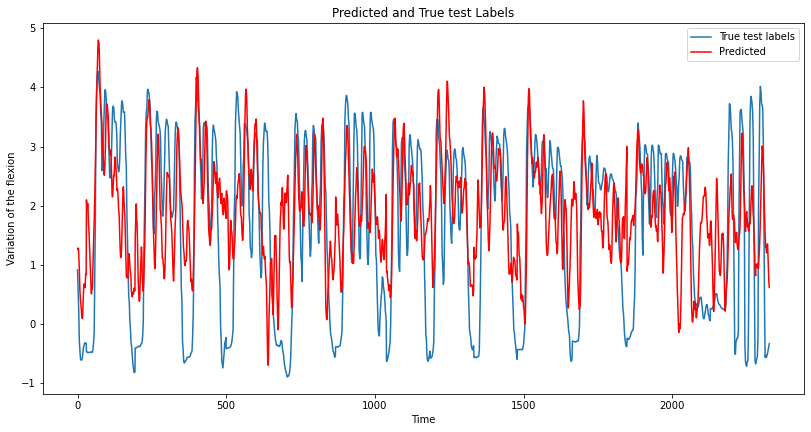

In [59]:
plot_train_test(y_pred_train,y_pred_test)

Interpretation:
    
    With this method, we have pretty good result for the test curve. It seems that it is better than the other method, seen previously.
    The extreme value of the pics follow more the true labels.

In [60]:
w_lasso = clf.coef_.flatten()

In [61]:
w_lasso

array([-0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.07757858,  0.        , -0.        ,  0.        ,  0.        ,
       -0.1146682 ,  0.        ,  0.09047535,  0.        ,  0.        ,
        0.37611771, -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.09769496,  0.        ,  0.        ,  0.10678253,
        0.08349543, -0.        ,  0.        , -0.09337529, -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.06143585, -0.        ,
       -0.        , -0.14587363,  0.14635455, -0.        ,  0.        ,
        0.27897347,  0.        ,  0.        , -0.70862161, -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.31889792])

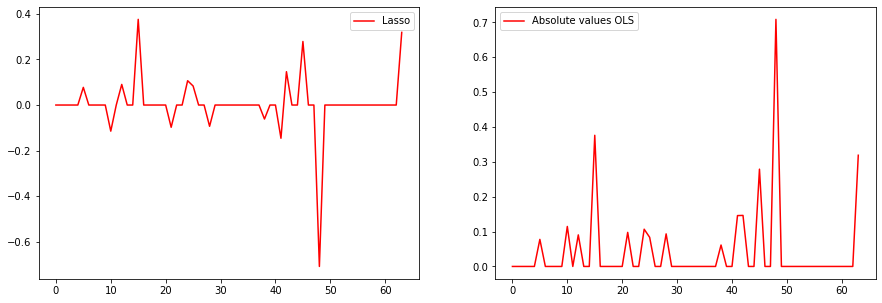

In [62]:
pl.figure(figsize=(15, 5))
pl.title('Coefficients')
pl.subplot(121)
pl.plot(w_lasso, label='Lasso', color = 'red')
pl.legend()

pl.subplot(122)
pl.plot(np.abs(w_lasso), label='Absolute values OLS', color = 'red')
pl.legend()
pl.show()

As indicated in the beginning of the TP, it seems that the best variable are in position 48 and 15 !
The reason behind is that those are the most extreme values in the parameters. We have another pic at aroud the 45/46 position.

In [63]:
features_selected = np.argwhere(w_lasso != 0)
n_features_selected = len(features_selected)
n_features_selected

14

Interpretation:

    The number of features which were not equal to 0 in our parameter list is 14.
    So the number of electrode at the beginning was 64, here we have 14 selected features: Thus the number of electrode that were "as deleted" were 50.

# 6 Nonlinear regression

### RandomForestRegressor

In [64]:
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
#print(R2_train,MSE_train)
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
#print(R2_test,MSE_test)

C:\Users\reppe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [65]:
res = {
'Model' : ['RandomForestRegressor default'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451
5,RandomForestRegressor default,0.024029,1.611092,0.992349,0.244497


In [66]:
parameters = {'n_estimators': [100, 200, 300, 400],
               'min_samples_leaf': [1, 2, 3, 4, 5]
              }
print("Looking for parameters to optimize")
      
RFR = GridSearchCV(RandomForestRegressor(), parameters, cv=3, verbose=3)
RFR.fit(X_train, Y_train.ravel())
      
best_rfr = RFR.best_estimator_
n_estimators = best_rfr.get_params()['n_estimators']
min_samples_leaf = best_rfr.get_params()['min_samples_leaf']

print('Best parameters are n_estimators = ', n_estimators, 'min_samples_leaf', min_samples_leaf)

clf = RandomForestRegressor(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf)
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
#print(R2_train,MSE_train)
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
#print(R2_test,MSE_test)

res = {
'Model' : ['RandomForest Best'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

Looking for parameters to optimize
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END min_samples_leaf=1, n_estimators=100;, score=0.192 total time=   1.2s
[CV 2/3] END min_samples_leaf=1, n_estimators=100;, score=0.234 total time=   1.2s
[CV 3/3] END min_samples_leaf=1, n_estimators=100;, score=0.238 total time=   2.6s
[CV 1/3] END min_samples_leaf=1, n_estimators=200;, score=0.202 total time=   3.4s
[CV 2/3] END min_samples_leaf=1, n_estimators=200;, score=0.252 total time=   2.9s
[CV 3/3] END min_samples_leaf=1, n_estimators=200;, score=0.225 total time=   4.3s
[CV 1/3] END min_samples_leaf=1, n_estimators=300;, score=0.173 total time=   5.0s
[CV 2/3] END min_samples_leaf=1, n_estimators=300;, score=0.273 total time=   4.8s
[CV 3/3] END min_samples_leaf=1, n_estimators=300;, score=0.205 total time=   6.6s
[CV 1/3] END min_samples_leaf=1, n_estimators=400;, score=0.184 total time=   7.6s
[CV 2/3] END min_samples_leaf=1, n_estimators=400;, score=0.245 total time

C:\Users\reppe\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451
5,RandomForestRegressor default,0.024029,1.611092,0.992349,0.244497
6,RandomForest Best,0.040831,1.684221,0.986999,0.210204


In [67]:
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451
5,RandomForestRegressor default,0.024029,1.611092,0.992349,0.244497
6,RandomForest Best,0.040831,1.684221,0.986999,0.210204


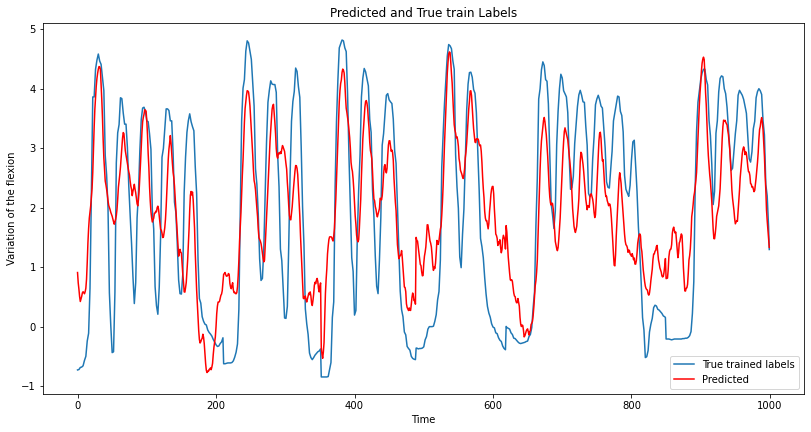

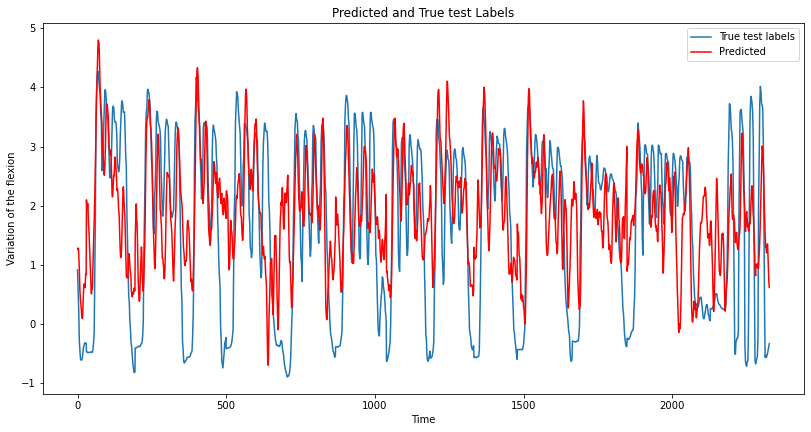

In [68]:
plot_train_test(y_pred_train,y_pred_test)

Interpretation :
    We decreased a little the MSE_test comparing to the random forest by default.

### SVR

In [67]:
clf = SVR()
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
print(R2_train,MSE_train)
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
print(R2_test,MSE_test)

0.9923307634481734 0.024085982516610364
0.28947213490412815 1.515182870123942


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
res = {
'Model' : ['SVR default'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451
5,RandomForestRegressor default,0.025165,1.681892,0.991987,0.211296
6,RandomForest Best,0.041916,1.577151,0.986653,0.260413
7,SVR default,0.024086,1.515183,0.992331,0.289472


In [69]:
parameters = [{'kernel': ['rbf', 'poly', 'sigmoid'], 
               'C': [ 0.5, 1, 10, 100, 1000]}]

print("Looking for parameters to optimize")
svr = GridSearchCV(SVR(), parameters, cv = 5)
svr.fit(X_train, Y_train.ravel())
best_svr = svr.best_estimator_
C = best_svr.get_params()['C']
kernel = best_svr.get_params()['kernel']
gamma = best_svr.get_params()['gamma']
print('Best parameters are Kernel = ', kernel, 'and C =', C, 'and gamma =', gamma)

Looking for parameters to optimize
Best parameters are Kernel =  rbf and C = 10 and gamma = scale


C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


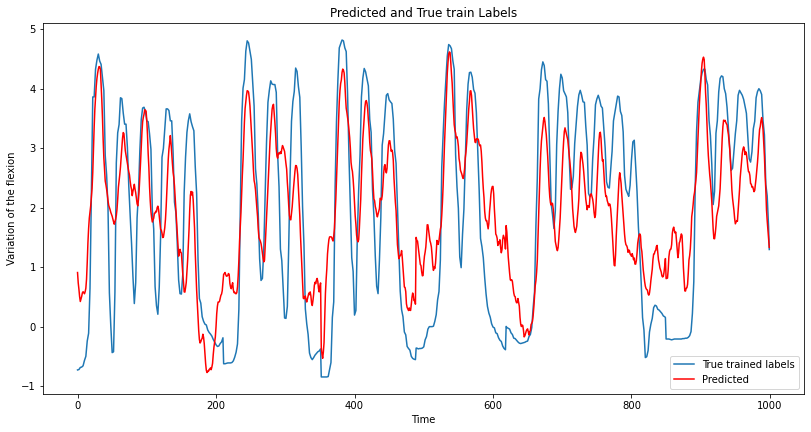

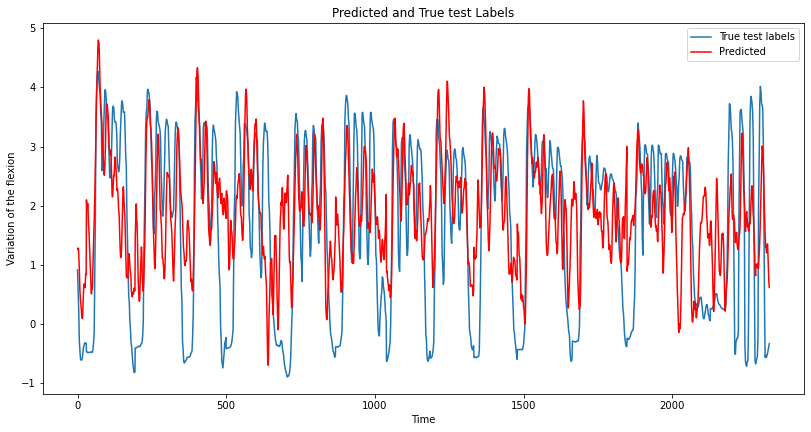

In [70]:
clf = SVR(kernel = 'rbf', C = 10, gamma = 'scale')
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
#print(R2_train,MSE_train)
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
#print(R2_test,MSE_test)

res = {
'Model' : ['SVR best'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
plot_train_test(y_pred_train,y_pred_test)


### MLP Classifier

In [71]:
clf = MLPRegressor()
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
print(R2_train,MSE_train)
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
print(R2_test,MSE_test)

C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.997632247755532 0.007436155969180156
0.0051826175101982175 2.1214231431257105


In [72]:
res = {
'Model' : ['MLP Regressor default'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451
5,RandomForestRegressor default,0.025165,1.681892,0.991987,0.211296
6,RandomForest Best,0.041916,1.577151,0.986653,0.260413
7,SVR default,0.024086,1.515183,0.992331,0.289472
8,SVR best,0.006274,1.553232,0.998002,0.271629
9,MLP Regressor default,0.007436,2.121423,0.997632,0.005183


### Gradient Boosting Regressor

In [73]:
clf = GradientBoostingRegressor()
clf.fit(X_train, Y_train)
predic_train = clf.predict(X_train)
predic_test = clf.predict(X_test)
#Performance on Training Set
y_pred = predic_train
y_true = Y_train
R2_train = r2_score(y_true,y_pred)
MSE_train = mean_squared_error(y_true, y_pred)
print(R2_train,MSE_train)
#Performance on Test Set
y_pred = predic_test
y_true = Y_test
R2_test = r2_score(y_true,y_pred)
MSE_test = mean_squared_error(y_true, y_pred)
print(R2_test,MSE_test)

res = {
'Model' : ['Gradient Boosting Regressor default'], 
'MSE_train': [MSE_train],
'MSE_test': [MSE_test], 
'R2_train' : [R2_train],
'R2_test' : [R2_test]
}
to_join = pd.DataFrame(res)
SCORE = pd.concat([SCORE, to_join], ignore_index = True)
SCORE

C:\Users\reppe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9639122330254936 0.11333713838888569
0.20959045077257776 1.6855285601081698


,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451
5,RandomForestRegressor default,0.025165,1.681892,0.991987,0.211296
6,RandomForest Best,0.041916,1.577151,0.986653,0.260413
7,SVR default,0.024086,1.515183,0.992331,0.289472
8,SVR best,0.006274,1.553232,0.998002,0.271629
9,MLP Regressor default,0.007436,2.121423,0.997632,0.005183


## 7 Final comparison of the performances

• Collect the test performances for all methods investigated above in a table (in a dataframe and printing
it for instance). Which methods work the best in practice?


In [74]:
SCORE

,Model,MSE_train,MSE_test,R2_train,R2_test
0,OLS,0.504065,3.045537,0.839500,-0.428170
1,RIDGE lambda = 1,0.504177,3.003843,0.839465,-0.408618
2,RIDGE best lambda (955),1.171943,1.623906,0.626841,0.238488
3,Lasso default,3.140597,2.190676,0.000000,-0.027293
4,Lasso best lambda = 0.126,1.221563,1.365954,0.611041,0.359451
5,RandomForestRegressor default,0.025165,1.681892,0.991987,0.211296
6,RandomForest Best,0.041916,1.577151,0.986653,0.260413
7,SVR default,0.024086,1.515183,0.992331,0.289472
8,SVR best,0.006274,1.553232,0.998002,0.271629
9,MLP Regressor default,0.007436,2.121423,0.997632,0.005183


In [81]:
SCORE_sorted = SCORE.sort_values(by='MSE_test').reset_index()
SCORE_sorted['Model'][:5]

0    Lasso best lambda = 0.126 
1                   SVR default
2                      SVR best
3             RandomForest Best
4      RIDGE best lambda (955) 
Name: Model, dtype: object

<div class="alert alert-block alert-success">
Interpretation:
    The best model is Lasso with its best parameter.

• What are the most interpretable models?


<div class="alert alert-block alert-success">
Linear Models are the most interpretable models.
Wth the plot of coefficients we could seen what was the most ilmportant features.
We don't have that for the other Models.

• Which model is best from a medical/practical perspective?

<div class="alert alert-block alert-success">
    
For a medical perspective, I think that the best model is also the Lasso. It is clearly understandable to detect what are the electrode that responds the best. He can focus on the most important electrode (the fourteen that we have seen).
With the position of each electrode, he will be able to determine which are the best electrod to keep and to focus on.


• Do we need non-linearity in this application?

<div class="alert alert-block alert-success">

In this application we don't really need non-linearity.

• Is validation on the test data a good practice? What would you do if you need to provide a model to
a client for prediction in production?

<div class="alert alert-block alert-success">
Last year, I learned that by dividing my dataset in 3 parts, I will have the following "good" procedure to make:
    
    - The training set, to train my data,
    - The validation set to validate my parameters for the model I chose,
    - The test set, to check if everything is ok.

<div class="alert alert-block alert-success">
<b>Conclusion:</b>
    
    
 What was hard to implement is the fact that there are lots of things to do twice, or more. 
 If I knew it earlier, I would have created some functions to make it.
    
    
     For instance, I decided to create a plot function because everytime I had things to plot for the train and then the test, 
 I realised it would be much simpler to just recall the function.
    
  At first what was hard to understand to me was the reason why in the MSE_train/MSE_test chart, the coeff parameters were all converging.
    
   So to make it brief, newt time I would create more general function to:
    
       Plot and Get the score without writing the code everytime.
       For the last part, I would probably make a function to create my model, because they are all with the same format but it is just the name of the model that changes.
    
    
   What was new to me was the "simplicity" of the way of looking at best parameters.
    Also, the fact that there are plenty of different models to achieve the same goal.
    
   I don't know yet about the professionnal setting, however using functions seems to me clear and lisible, in term of number of lines.
   
    To me, this course is very usefull to have a whole idea of the different concept, and how to implement it. That was what was missing me last year about other topics in Machine Learning.
        